# RANSAC algorithm

Robust line fitting using RANSAC algorithm

## Idea

- Given a hypothesized line
- Count the number of points that “agree” with the line
  - “Agree” = within a small distance of the line 
  - I.e., the inliers to that line
- For all possible lines, select the one with the largest number of inliers

## How do we find the best line?

- Unlikeleast-squares, no simple closed-form solution
- Hypothesize and test
  - Try out many lines, keep the best one 
  - But, which lines?

![](https://raw.githubusercontent.com/m-inh/i116-assignments/master/img/6_1.png)

![](https://raw.githubusercontent.com/m-inh/i116-assignments/master/img/6_2.png)

## RANSAC algorithm

1. Sample (randomly) the number of points required to fit the model (eg: 2)
1. Solve for model parameters using samples
1. Score by the fraction of inliers within a preset threshold of the model

**Repeat** 1-3 until the best model is found with high confidence

*Step 1*
![1](https://raw.githubusercontent.com/m-inh/i116-assignments/master/img/6_3.png)

*Step 2*
![2](https://raw.githubusercontent.com/m-inh/i116-assignments/master/img/6_4.png)

*Step 3*
![3](https://raw.githubusercontent.com/m-inh/i116-assignments/master/img/6_5.png)

*repeat 1-3 to find best model*
![repeat](https://raw.githubusercontent.com/m-inh/i116-assignments/master/img/6_6.png)




In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class Point2D:
  """Represent a 2-dimentional point in Euclidean space

  Attributes
  ----------
  x, y: float

  """
  def __init__(self, x, y):
    self.x = x
    self.y = y
  
  def __str__(self):
    return "(" + str(self.x) + ", " + str(self.y) + ")"



class Line2D:
  """Represent a 2-dimentional line in Euclidean space
     The function of line has format: y = ax + b
     
  Attributes
  ----------
  a, b: float

  """
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def find_y(self, x):
    return self.a*x + self.b


class Circle2D:
  """Represent a 2-dimentional circle in Euclidean space
     
  Attributes
  ----------
  pc: Point2D
  r: float

  """
  def __init__(self, pc, r):
    self.pc = pc
    self.r = r
  

In [3]:
def distance(p1, p2):
  """Calculate distance between two 2-dimentional points
  
  Parameters
  ----------
  p1, p2: Point2D

  Returns
  -------
  distance: float
  """
  return math.sqrt( (p1.x - p2.x)*(p1.x - p2.x) + (p1.y - p2.y)*(p1.y - p2.y) )




def create_line(p1, p2):
  """Create a line that contains two 2-dimentional points
     
     we have:
     line function is: y = ax + b
     first point is:  (x1, y1)
     second point is: (x2, y2)

     then: a = (y1-y2) / (x1-x2)
     and:  b = y1 - ax1
  
  Parameters
  ----------
  p1, p2: Point2D

  Returns
  -------
  line: Line2D
  """
  a = (p1.y-p2.y) / (p1.x-p2.x)
  b = p1.y - (a*p1.x)

  return Line2D(a, b)




def find_common_point(l1, l2):
  """Find a common 2-dimentional point between 2 lines
    
     we have:
     first line function is:  y = a1.x + b1
     second line function is: y = a2.x + b2
     common point between 2 lines is: (x0, y0)

     then: x0 = (b2-b1) / (a1-a2)
     and:  y0 = a1.x0 + b1
  
  Parameters
  ----------
  l1, l2: Line2D

  Returns
  -------
  common_point: Point2D
  """
  x0 = (l2.b-l1.b) / (l1.a-l2.a)
  y0 = l1.a*x0 + l1.b

  return Point2D(x0, y0)




def find_mid_perpendicular(p1, p2):
  """Find a middle perpendicular line between two 2-dimentional points
     First, we need to find middle point between two given points,
     Second, we need to find a line that contains two given points,
     Finally, find the middle perpendicular line.

     we have:
     two given points are: (x1, y1), (x2, y2)
     middle point between 2 given points is:  (x0, y0)
     line contains two given points is: y = a1.x + b1
     middle perpendicular line is:      y = a2.x + b2

     then: x0 = (x1 + x2) / 2
     and:  y0 = (y1 + y2) / 2
     and:  a1, b1 of common line is compute by `create_line` function
     then: a2 = -1/a1
     and:  b2 = y0 + x0/a1
  
  Parameters
  ----------
  p1, p2: Point2D

  Returns
  -------
  mid_perpendicular: Line2D
  """
  
  l1 = create_line(p1, p2)

  x_mid_point = (p1.x + p2.x) / 2
  y_mid_point = (p1.y + p2.y) / 2
  mid_point = Point2D(x_mid_point, y_mid_point)

  a2 = -1/l1.a
  b2 = mid_point.y + mid_point.x/l1.a

  return Line2D(a2, b2)




def get_center_of_enclosing_circle(p1, p2, p3):
  """Find a center point of enclosing circle that contains three given points
    
     We need to find two middle perpendicular line of 3 points first, 
     then find common point of these lines. This point is the center of enclosing circle.
  
  Parameters
  ----------
  p1, p2, p3: Point2D

  Returns
  -------
  center_point: Point2D
  """
  l1 = find_mid_perpendicular(p1, p2)
  l2 = find_mid_perpendicular(p1, p3)

  circle_point = find_common_point(l1, l2)

  return circle_point





def get_radius(p1, p2, p3):
  """Calculate radius of the enclosing circle that constructed by given 3 points
  
  Parameters
  ----------
  p1, p2, p3: Point2D

  Returns
  -------
  radius: float
  """
  p_circle = get_center_of_enclosing_circle(p1, p2, p3)
  r = distance(p1, p_circle)

  return r


def make_circle_2d(p1, p2, p3):
  pc = get_center_of_enclosing_circle(p1, p2, p3)
  r = get_radius(p1, p2, p3)
  return Circle2D(pc, r)


def is_the_same_2_points(p1, p2):
  return (p1.x == p2.x) and (p1.y == p2.y)

def is_the_similar_2_points(p1, p2):
  threshold = 0.0001
  return (abs(p1.x-p2.x) <= threshold) or (abs(p1.y-p2.y) <= threshold)

# Randomly choose 3 points
def choose_random_3_points(ps):
  i1 = 0
  i2 = 0
  i3 = 0
  while (
      (i1 == i2 or i2 == i3 or i1 == i3) 
     or (
         is_the_similar_2_points(ps[i1], ps[i2]) 
         or is_the_similar_2_points(ps[i1], ps[i3]) 
         or is_the_similar_2_points(ps[i2], ps[i3])
       )
     ):
    i1 = int(np.random.uniform(0, len(ps)))
    i2 = int(np.random.uniform(0, len(ps)))
    i3 = int(np.random.uniform(0, len(ps)))

  return [ps[i1], ps[i2], ps[i3]]


def common_point(line1, line2):
  # y0 = ax0 + b
  # y0 = a'x0 + b'
  # -> x0 = (b-b') / (a'-a)
  # -> y0 = ax0 + b
  x0 = (line1.b-line2.b) / (line2.a-line1.a)
  y0 = (line1.a*x0) + line1.b
  return Point2D(x0, y0)


def distance_point_to_point(p1, p2):
  a = p1.x - p2.x
  b = p1.y - p2.y
  return math.sqrt((a*a) + (b*b))


def distance_line_to_point(line1, p):
  # y = ax + b
  # y = (-1/a)x + b'
  # -> b' = y0 + (1/a)x0
  a2 = -1 / line1.a
  b2 = p.y + (p.x/line1.a)
  line2 = Line2D(a2, b2)

  c_point = common_point(line1, line2)
  return distance_point_to_point(p, c_point)


def distance_circle_to_point(c, p):
  return abs(distance_point_to_point(p, c.pc) - c.r)


# Visualize sample data
def visualize_sample(ps):
  plt.axis("equal")

  # Draw points
  for p in ps:
    plt.scatter(p.x, p.y, color='r')

  plt.show()


# Visualize sample data with random line with inliers
def visualize_all(ps, c, rps, inliers, current_score, threshold, iter):
  plt.ylabel('Y')
  plt.xlabel('X')
  plt.axis('equal')

  # Draw circle
  ax = plt.gca()
  pc = c.pc
  r = c.r
  circle = plt.Circle((pc.x, pc.y), r, color='g', fill=False)
  ax.add_artist(circle)

  # Draw points
  for i in range(len(ps)):
    p = ps[i]
    if ((p.x == rps[0].x and p.y == rps[0].y) or (p.x == rps[1].x and p.y == rps[1].y) or (p.x == rps[2].x and p.y == rps[2].y)):
      plt.scatter(p.x, p.y, color='b')
    elif inliers[i] == True:
      plt.scatter(p.x, p.y, color='g')
    else:
      plt.scatter(p.x, p.y, color='r')

  plt.xlabel("step: " + str(iter) + ", threshold: " + str(threshold) + ", inliers: " + str(current_score))
  plt.show()

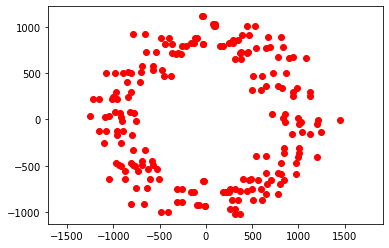

In [4]:
# Prepare sample data
n = 100

random_circles = datasets.make_circles(n_samples=n, shuffle=True, noise=0.1, random_state=None, factor=0.8)
random_points = random_circles[0]
pxs = []
pys = []
ps = []

for i in range(n):
  x = random_points[i][0] * 1000
  y = random_points[i][1] * 1000
  ps.append(Point2D(x, y))
  pxs.append(x)
  pys.append(y)

# double data for testing
for i in range(n):
  x = random_points[i][0] * 1200
  y = random_points[i][1] * 1000
  ps.append(Point2D(x, y))
  pxs.append(x)
  pys.append(y)

visualize_sample(ps)

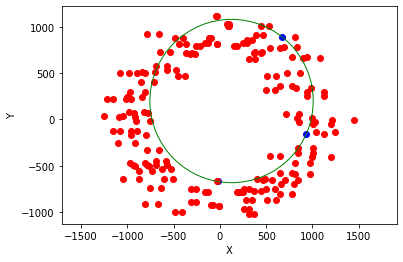

In [12]:
def draw(p1, p2, p3, c):
  """Draw the a circle using plotting library (matplotlib)
  
  Parameters
  ----------
  p1, p2, p3: Point2D
  c: Circle2D

  Returns
  -------
  None
  """
  plt.ylabel('Y')
  plt.xlabel('X')
  plt.axis('equal')

  # Draw circle
  ax = plt.gca()
  pc = c.pc
  r = c.r
  circle = plt.Circle((pc.x, pc.y), r, color='g', fill=False)
  ax.add_artist(circle)

  rps = [p1, p2, p3]

  # Draw points
  for i in range(len(ps)):
    p = ps[i]
    if ((p.x == rps[0].x and p.y == rps[0].y) or (p.x == rps[1].x and p.y == rps[1].y) or (p.x == rps[2].x and p.y == rps[2].y)):
      plt.scatter(p.x, p.y, color='b')
    else:
      plt.scatter(p.x, p.y, color='r')

  plt.show()



p1, p2, p3 = choose_random_3_points(ps)
c = make_circle_2d(p1, p2, p3)

draw(p1, p2, p3, c)

In [6]:
"""This section is prepared for the 3rd step and the repeat procedure in RANSAC algorithm
   
   3rd step: Score by the fraction of inliers within a preset threshold of the model
   Repeat procedure: Repeate 1-3 until the best model is found with high confidence
"""

def score(ps, c, threshold):
  inliers_count = 0
  inliers = []
  
  for i in range(len(ps)):
    delta = distance_circle_to_point(c, ps[i])
    if (delta <= threshold):
      inliers_count += 1
      inliers.append(True)
    else:
      inliers.append(False)
  
  return inliers_count, inliers



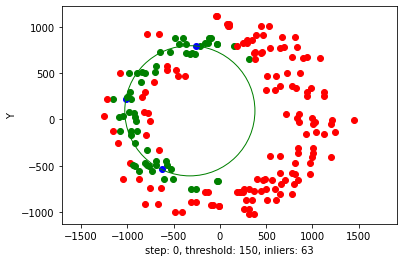

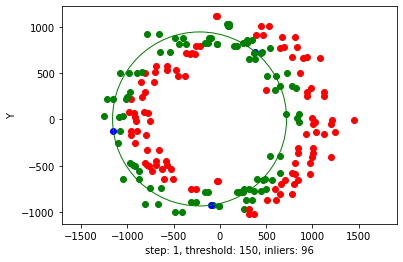

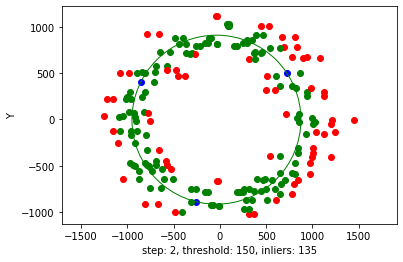

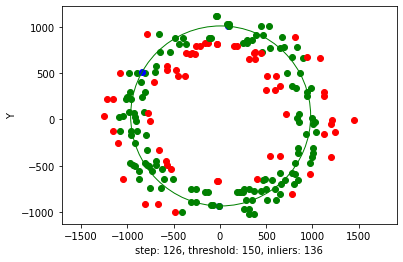

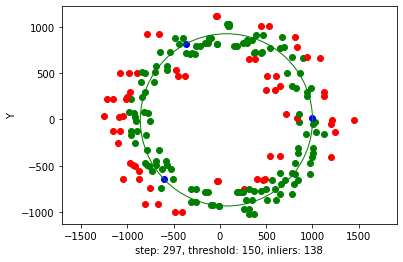

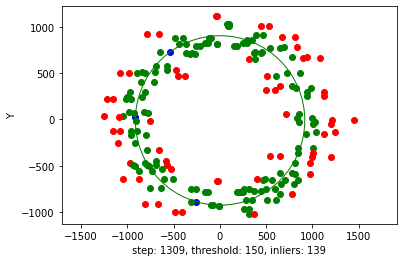

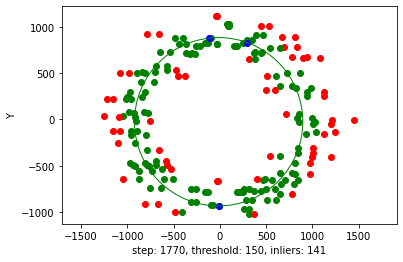

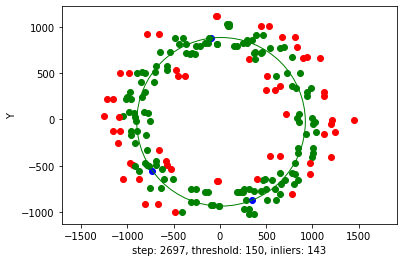

In [7]:
"""This section is for testing
   
   Functions are tested:
   - choose_random_3_points
   - make_circle_2d
   - score

   If some figures is drawn correctly, the test is success
"""
threshold = 150
max_try = 10000

best_score = 0
best_circle = None
best_inliers = []
best_random_points = []

for i in range(max_try):
  r_p1, r_p2, r_p3 = choose_random_3_points(ps)
  current_circle = make_circle_2d(r_p1, r_p2, r_p3)
  current_score, current_inliers = score(ps, current_circle, threshold)
  if (current_score > best_score):
    best_score = current_score
    best_circle = current_circle
    best_inliers = current_inliers
    best_random_points = [r_p1, r_p2, r_p3]
    
    visualize_all(ps, best_circle, best_random_points, best_inliers, current_score, threshold, i)